# Preprocessing TenGeoP-SARwv dataset #
Diego Xavier Bezerra
INPE
28-sep-20

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/?completed=/introduction-deep-learning-python-tensorflow-keras/

### IMPORT LIBs ###

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import normalize
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
import gdal
from gdalconst import *
import random
import pickle

from matplotlib import pyplot as plt

Using TensorFlow backend.
C:\Users\diego_home\miniconda3\envs\py368\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\diego_home\miniconda3\envs\py368\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\diego_home\miniconda3\envs\py368\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\diego_home\miniconda

In [2]:
def tiff2arr(img):
    '''
    Loads GeoTIFF image into numpy array
    '''
    dset = gdal.Open(img, GA_ReadOnly)
    arr = dset.GetRasterBand(1).ReadAsArray()
    dset = None
    return arr

### CONVERT DATASET TO TRAINING DATA ###

[[0.00049417 0.00047441 0.00045464 ... 0.04585929 0.03052015 0.04368492]
 [0.02972136 0.02196175 0.01776722 ... 0.03746509 0.01945456 0.03142455]
 [0.06306906 0.05211043 0.05670196 ... 0.03068329 0.02733422 0.02234287]
 ...
 [0.05889155 0.0640195  0.06895467 ... 0.00869713 0.01126937 0.03304801]
 [0.07232044 0.0776998  0.0790999  ... 0.0098683  0.01300012 0.02454486]
 [0.07601488 0.09075027 0.10141903 ... 0.01027362 0.01040533 0.01735319]]
(489, 563)
0.14687648256190072 0.00023720319981632645


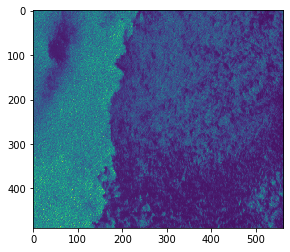

In [4]:
DATADIR = r"D:\ocean_features\wang_dataset"
CATEGORIES = ['F', 'G', 'H', 'I', 'M', 'N', 'O']

for CAT in CATEGORIES[5:]:
    path = os.path.join(DATADIR, CAT)
    for img in os.listdir(path):
        
        img_arr = tiff2arr(os.path.join(path, img))
        img_arr = normalize(img_arr)
        new_array = cv2.resize(img_arr, (100, 100))
        
        
        plt.imshow(img_arr)
        print(img_arr)
        print(img_arr.shape)
        print(np.max(img_arr), np.min(img_arr))

        
        break
    break

In [120]:
training_data = []
#training_data = np.load(r"D:\ocean_features\wang_dataset\training_data_100x100.npy")
IMG_SIZE = 100

In [121]:
# NORMALIZE DATA

def create_traininig_data():
    for CAT in CATEGORIES:
        print(CAT)
        path = os.path.join(DATADIR, CAT)
        class_num = CATEGORIES.index(CAT)
        for img in os.listdir(path):
            try:
                img_arr = tiff2arr(os.path.join(path, img))
                img_arr = normalize(img_arr)  # Normalize to 0-1
                new_array = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        
                training_data.append([new_array, class_num])
            except:
                print('broken img')

create_traininig_data()
print(len(training_data))

F
G
H
I
M
N
O
26494


### RANDOMIZE DATA ####

In [122]:
random.shuffle(training_data)

In [123]:
# CHECK IF DATA IS NICELY SHUFFLED
for sample in training_data[:10]:
    print(sample[1])  # this is the label

0
4
3
2
0
0
0
1
2
0


### SAVE DATA ####

In [126]:
X = []
y = []

In [127]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [141]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # n images, width, height, ?
print(X.shape)
print(X)

(26494, 100, 100, 1)
[[[[0.0261207 ]
   [0.03795942]
   [0.03833137]
   ...
   [0.04327739]
   [0.04981266]
   [0.04353898]]

  [[0.05625414]
   [0.0456884 ]
   [0.03994137]
   ...
   [0.04214237]
   [0.02930791]
   [0.03472965]]

  [[0.02969543]
   [0.03067314]
   [0.04925266]
   ...
   [0.03074893]
   [0.04083505]
   [0.05529804]]

  ...

  [[0.03552803]
   [0.04073274]
   [0.03935237]
   ...
   [0.03437097]
   [0.03858076]
   [0.02749763]]

  [[0.05510895]
   [0.04682982]
   [0.04723826]
   ...
   [0.03321596]
   [0.03856242]
   [0.03837138]]

  [[0.03819056]
   [0.03063775]
   [0.03725783]
   ...
   [0.0398412 ]
   [0.03975938]
   [0.03400253]]]


 [[[0.01716041]
   [0.01716686]
   [0.02041947]
   ...
   [0.02168922]
   [0.02288664]
   [0.02271349]]

  [[0.01953208]
   [0.01928315]
   [0.02055709]
   ...
   [0.02458116]
   [0.02355513]
   [0.02353849]]

  [[0.05190163]
   [0.03670323]
   [0.01660748]
   ...
   [0.01916407]
   [0.02012145]
   [0.02025407]]

  ...

  [[0.01889336]
  

In [144]:
pickle_out = open(r"D:\ocean_features\wang_dataset\X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(r"D:\ocean_features\wang_dataset\y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()